<a href="https://colab.research.google.com/github/OJO44/24bMachineLearning1/blob/main/ShillBiddingDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
data = "/content/Shill_Bidding_Dataset.csv"
df= pd.read_csv(data)
df.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [3]:
df.columns

Index(['Record_ID', 'Auction_ID', 'Bidder_ID', 'Bidder_Tendency',
       'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding',
       'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding',
       'Winning_Ratio', 'Auction_Duration', 'Class'],
      dtype='object')

In [4]:
# #remove the columns that are irrelevant to the case study; that is, remove
# the Record_ID, Auction_ID, and Bidder_ID columns. This is because
# these columns contain unique IDs and thus do not add any new information to
# the model
df1 = df.drop(columns=['Record_ID', 'Auction_ID', 'Bidder_ID'])
df1.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [5]:
#. Split the data into training and testing
X = df1.drop("Class",axis = 1)
y = df1["Class"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 1, stratify =y)

In [6]:
print("Training dataset size: {}, Testing dataset size: {}"\
 .format(X_train.shape,X_test.shape))

Training dataset size: (4424, 9), Testing dataset size: (1897, 9)


In [7]:
#Fit the model using linear regression
linear = linear_model.LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [8]:
#Predict the first 10 dataset
linear.predict(X_test)[:10]

array([-0.00375542, -0.00248633, -0.01090699, -0.02753235,  0.01939224,
        0.99493654,  0.02761226, -0.00565047,  0.48101551,  0.00471959])

In [9]:
#check for the actual values using y test
y_test[:10].values

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

It is evident that linear regression cannot be used for the prediction

In [10]:
#Fit the model using logistic regression
logit = linear_model.LogisticRegression()
logit.fit(X_train,y_train)

LogisticRegression()

In [11]:
#predict the first 10 xtest
logit.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [12]:
#check the actual target values
y_test[:10].values

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [13]:
#Get the scores on the trainng and test dataset
print("Score on training dataset: {}, "\
 "Score on testing dataset: {}"\
 .format(logit.score(X_train,y_train),\
 logit.score(X_test,y_test)))

Score on training dataset: 0.9794303797468354, Score on testing dataset: 0.9715340010542962


For this dataset, logostic regression gives a better score than linear regression

In [15]:
#Fit the model using support vector mechanism
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf_svm= svm.SVC(kernel='linear', C=1)
clf_svm.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [16]:
#Calculate the accuracy scor:
clf_svm.score(X_test, y_test)

0.981549815498155

In [23]:
#Decision Tree
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image


In [19]:
#fit the decision tree classifier
clf_tree = tree.DecisionTreeClassifier()
clf_tree= clf_tree.fit(X_train, y_train)

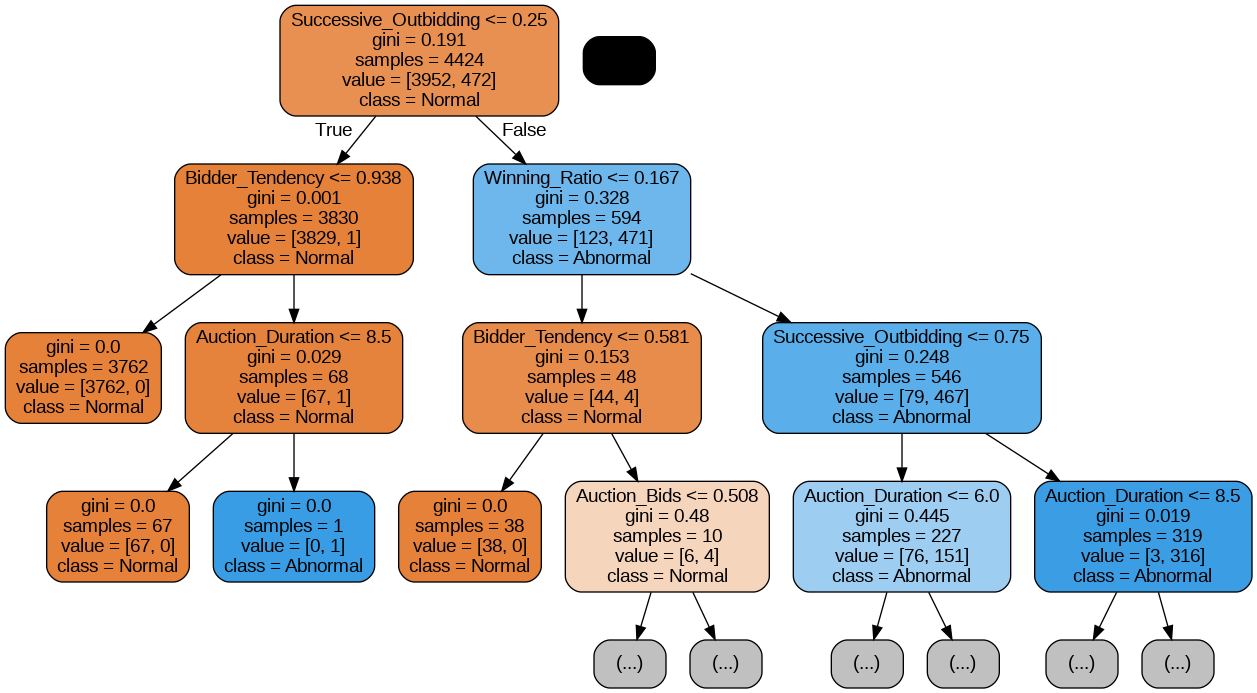

In [25]:
#plot decision tree
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image
from io import StringIO

# Plot decision tree
dot_data = StringIO()
export_graphviz(clf_tree,
                out_file=dot_data,
                filled=True,
                rounded=True,
                class_names=['Normal', 'Abnormal'],
                max_depth=3,
                feature_names=X.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())



In [26]:
#Calculate accuracy of the model
clf_tree.score(X_test,y_test)

0.9978914074855034

The decision tree
classifier scores an accuracy of around 99.79%. Hence our classifier can predict
99.79% of the test data correctly